In [2]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [3]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('/content/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [5]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

index                                id               breed
0      9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
1     12  00693b8bc2470375cc744a6391d397ec         maltese_dog
2     79  01e787576c003930f96c966f9c3e1d44  scottish_deerhound
3     80  01ee3c7ff9bcaba9874183135877670e         entlebucher
4     88  021b5a49189665c0442c19b5b33e8cf1         entlebucher

In [11]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/content/drive/MyDrive/КЗ/1/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 588/588 [02:13<00:00,  4.41it/s]


Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


In [12]:
# Building the Model
model = Sequential()

'''
input_shape: Форма входных данных 224 na 224 RGB
kernel_size: какой размер сканироват
units: Количество нейронов в слое
kernel_regularizer: регуляризация - уменьшить переобучение и повысить обобщающую способность модели
'''


model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3))) #сверточный слой для определния разных форм, текстуры и тд
model.add(MaxPool2D(pool_size=(2,2))) #уменьшение  размерность пред. слоя (выбор макс области, pool_sz определяет размер )

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # преобразование предыдущих данных в вектор
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2')) #соединение предыдущих слоев с текущим
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

In [13]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [14]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 40s 10s/step - loss: 5.3957 - accuracy: 0.1986 - val_loss: 5.3614 - val_accuracy: 0.2358
Epoch 2/100
4/4 [==============================] - 40s 10s/step - loss: 5.3462 - accuracy: 0.2222 - val_loss: 5.3162 - val_accuracy: 0.2453
Epoch 3/100
4/4 [==============================] - 35s 8s/step - loss: 5.2984 - accuracy: 0.2388 - val_loss: 5.2704 - val_accuracy: 0.2642
Epoch 4/100
4/4 [==============================] - 35s 8s/step - loss: 5.2516 - accuracy: 0.2813 - val_loss: 5.2272 - val_accuracy: 0.3113
Epoch 5/100
4/4 [==============================] - 37s 9s/step - loss: 5.2065 - accuracy: 0.3357 - val_loss: 5.1855 - val_accuracy: 0.2547
Epoch 6/100
4/4 [==============================] - 34s 8s/step - loss: 5.1603 - accuracy: 0.3381 - val_loss: 5.1427 - val_accuracy: 0.2642
Epoch 7/100
4/4 [==============================] - 35s 8s/step - loss: 5.1136 - accuracy: 0.3310 - val_loss: 5.0994 - val_accuracy: 0.2358
Epoch 8/100
4/4 [========

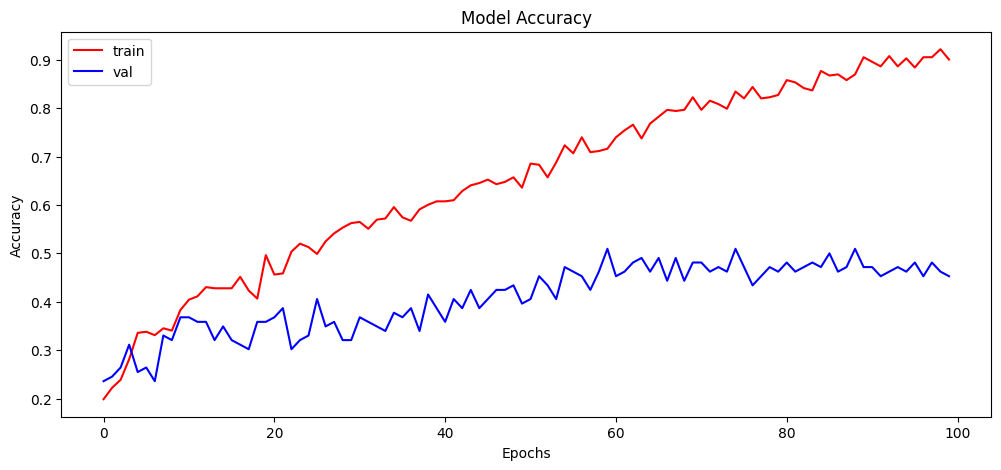

In [15]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [16]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 3s 1s/step - loss: 3.6232 - accuracy: 0.5593
Accuracy over the test set: 
  55.93 %


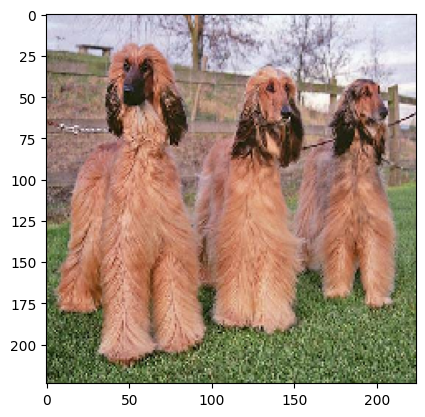

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [19]:
# Plotting image to compare
plt.imshow(X_test[2,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[2])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[2])])